In [12]:
import warnings
warnings.filterwarnings('ignore')

# Day 10 NDVI for healthy vegetation cover

I have two crops over the Amazon rainforest for 2016 and 2018. I want to segment the image and find forest not forest. What about using NDVI?

### Calculate NDVI
It is known that healthy vegetation reflects light strongly in the near infrared band and less strongly in the visible portion of the spectrum. Thus, if you create a ratio between light reflected in the near infrared and light reflected in the visible spectrum, it will represent areas that potentially have healthy vegetation.

NDVI = (NIR - Red) / (NIR + Red)
![ndvi](https://www.earthdatascience.org/images/courses/earth-analytics/remote-sensing/nasa-earth-observatory-ndvi-diagram.jpg)

In [26]:
from pathlib import Path
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

In [2]:
data18 = Path('../data/amazon/20180929T140051/20180929T140051_crop')
data16 = Path('../data/amazon/20160909T140052/20160909T140052_crop')

In [7]:
# reads in as a numpy array
with rasterio.open(data18) as src18:
    im18 = src18.read()
with rasterio.open(data16) as src16:
    im16 = src16.read()

In [90]:
im18.shape

(4, 1001, 1001)

In [13]:
im18_ndvi = (im18[3] - im18[2]) / (im18[3] + im18[2])
im16_ndvi = (im16[3] - im16[2]) / (im16[3] + im16[2])

So what do I know about matplotlib?

**What is fig?** The Figure is the overall window or page that everything is drawn on.

**What is axes?** To the figure you add Axes. The Axes is the area on which the data is plotted with functions such as `plot()` and can have ticks, labels etc.

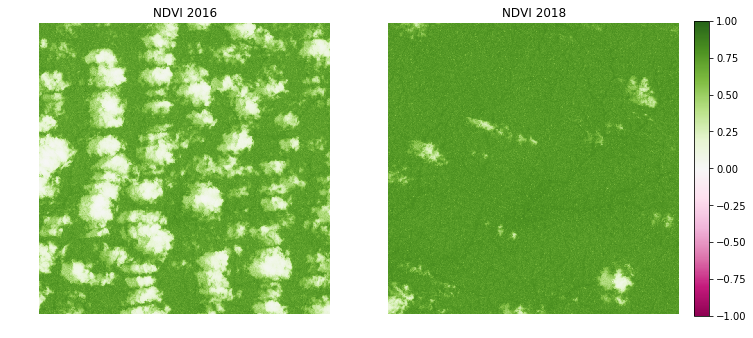

In [76]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
for ax, arr, lbl in ((axes[0], im16_ndvi, 'NDVI 2016'), 
                    (axes[1], im18_ndvi, 'NDVI 2018')):
    mappable = ax.imshow(arr, vmin=-1, vmax=1, cmap='PiYG')
    ax.set_title(lbl)
    ax.axis('off')
fig.colorbar(mappable=mappable, ax=axes[:2], fraction=0.022, pad=0.022)
plt.show()

In [100]:
low_ndvi16 = (im16_ndvi < -0.5).sum()
low_ndvi18 = (im18_ndvi < -0.5).sum()

0

Seems like a healthy rainforest! 